# Question Generation
The goal is to create a question generation dataset from Squad V1.1.

Based on [arxiv](https://arxiv.org/pdf/2005.01107v1.pdf) paper of *Transformer-based End-to-End Question Generation* 

I think there is a convenience around All Questions Per Line (AQPL), though it didnt perform as well as One Question Per Line (OQPL). The performances are quite similar as shown here:

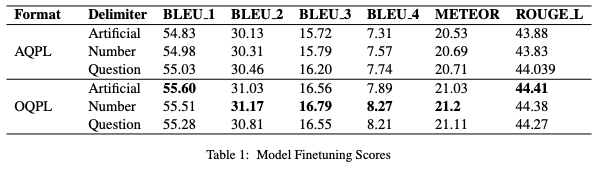

## Setup

In [1]:
# Print multiple outputs per cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%pip install datasets huggingface_hub

Note: you may need to restart the kernel to use updated packages.


In [3]:
from datasets import load_dataset
from huggingface_hub import notebook_login

## Connect to Hugging Face 🤗
- To be able to share the datset in the Hub, we need to login with a token
- Learn to create tokens [here](https://huggingface.co/docs/hub/security-tokens) if you dont already have one


In [4]:
notebook_login()

Token is valid.
Your token has been saved in your configured git credential helpers (osxkeychain).
Your token has been saved to /Users/derekthomas/.cache/huggingface/token
Login successful


## Dataset origin
I took the code from [Thomas Simonini notebook](https://colab.research.google.com/drive/1z-Zl2hftMrFXabYfmz8o9YZpgYx6sGeW?usp=sharing#scrollTo=YF1u2pxsFvQl) and Ill add it to the hub since he never got around to it!


> - We use [SQuAD v1.1](https://rajpurkar.github.io/SQuAD-explorer/), but a **modified version** where questions for a context are **concatenated**.
> - You need to [download the file here](https://www.simoninithomas.com/hfdataset/squad_modified_for_t5_qg.zip), unzip it and upload it in the next cell.

In [5]:
raw_dataset = load_dataset("squad_modified_for_t5_qg.py")

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset squad_modified_for_t5_qg downloaded and prepared to /Users/derekthomas/.cache/huggingface/datasets/squad_modified_for_t5_qg/plain_text/2.9.0/51e36f85e69301b9554545b12c18534864e91ffede9852cbecbb24a8bb53c6ca. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

## Verification
Let's make sure it looks good

In [6]:
list(raw_dataset["train"][0].keys())

['context', 'questions']

In [7]:
raw_dataset["train"][0]['context']
raw_dataset["train"][0]['questions']

'generate questions: Architecturally, the school has a Catholic character. Atop the Main Building\'s gold dome is a golden statue of the Virgin Mary. Immediately in front of the Main Building and facing it, is a copper statue of Christ with arms upraised with the legend "Venite Ad Me Omnes". Next to the Main Building is the Basilica of the Sacred Heart. Immediately behind the basilica is the Grotto, a Marian place of prayer and reflection. It is a replica of the grotto at Lourdes, France where the Virgin Mary reputedly appeared to Saint Bernadette Soubirous in 1858. At the end of the main drive (and in a direct line that connects through 3 statues and the Gold Dome), is a simple, modern stone statue of Mary.'

'To whom did the Virgin Mary allegedly appear in 1858 in Lourdes France? {sep_token} What is in front of the Notre Dame Main Building? {sep_token} The Basilica of the Sacred heart at Notre Dame is beside to which structure? {sep_token} What is the Grotto at Notre Dame? {sep_token} What sits on top of the Main Building at Notre Dame? {sep_token}'

Note that the context is prepended with `generate questions: `. This is so that T5/Flan T5 can identify the task. Its not important if we only have 1 intention, but its handy to maintain the rest of what it has been trained to do. Check out all the prefixes in [Appendix D](https://arxiv.org/pdf/1910.10683.pdf#page=47).

It looks good, lets add it to the hub.

In [8]:
raw_dataset.push_to_hub("squad-v1.1-t5-question-generation")

Pushing split train to the Hub.


Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/19 [00:00<?, ?ba/s]

Upload 1 LFS files:   0%|          | 0/1 [00:00<?, ?it/s]

Deleting unused files from dataset repository:   0%|          | 0/1 [00:00<?, ?it/s]

Pushing split validation to the Hub.


Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

Upload 1 LFS files:   0%|          | 0/1 [00:00<?, ?it/s]

Deleting unused files from dataset repository:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
len(raw_dataset['train']) + len(raw_dataset['validation'])

20963

## Dataset Card
Using this [tagging tool](https://huggingface.co/spaces/huggingface/datasets-tagging), you can properly tag your work! Ill put the data below, but will manually add it to the [generated dataset](https://huggingface.co/datasets/derek-thomas/squad-v1.1-t5-question-generation).

In [10]:
print("""
annotations_creators:
- crowdsourced
language:
- en
language_creators:
- crowdsourced
license:
- cc-by-4.0
multilinguality:
- monolingual
pretty_name: Question Generation dataset based on Squad V1.1
size_categories:
- 10K<n<100K
source_datasets:
- extended|squad
tags:
- questiongeneration
- question-generation
- text2text-generation
task_categories:
- text2text-generation
task_ids: []""")


annotations_creators:
- crowdsourced
language:
- en
language_creators:
- crowdsourced
license:
- cc-by-4.0
multilinguality:
- monolingual
pretty_name: Question Generation dataset based on Squad V1.1
size_categories:
- 10K<n<100K
source_datasets:
- extended|squad
tags:
- questiongeneration
- question-generation
- text2text-generation
task_categories:
- text2text-generation
task_ids: []
